# Pandas 4 Exercise
### Suleyman Gozen
I thank Yung-Hsu Tsui for his valuable comments.

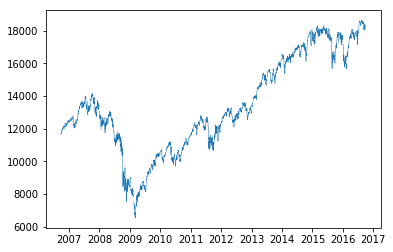

In [29]:
""" Problem 1"""
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DJIA = pd.read_csv('djia.csv')
pd.to_datetime(DJIA['DATE'])
date_index = pd.to_datetime(DJIA['DATE'], format="%Y-%m-%d")
B = pd.DataFrame(DJIA['VALUE'].values, index=date_index)
B = B[B != '.']
B = B.astype(np.float)
plt.plot(B,lw=.5)
plt.show()

In [30]:
""" Problem 2"""
PC = pd.read_csv('paychecks.csv',header=None)
A = pd.date_range(start='3/13/2008', periods= len(PC), freq="WOM-3FRI" )
B = pd.date_range(start='3/13/2008', periods= len(PC), freq="WOM-1FRI" )
A = A.astype(str)
B = B.astype(str)
C = np.concatenate((A,B), axis=0)
C = np.sort(C)
date_index = pd.to_datetime(C[0:len(PC)], format="%Y-%m-%d")
D = pd.DataFrame(PC.values, index=date_index, columns = ['Salary'])
plt.plot(D)
plt.show

<function matplotlib.pyplot.show>

In [31]:
""" Problem 3"""
F = pd.read_csv('finances.csv')
A = pd.period_range(start="1978", periods = len(F), freq="Q-SEP")
B = pd.DataFrame(F.values, index= A, columns=['EARNINGS', 'EXPENSES'])
B.plot()

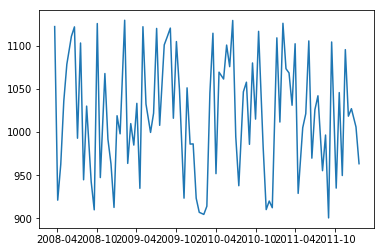

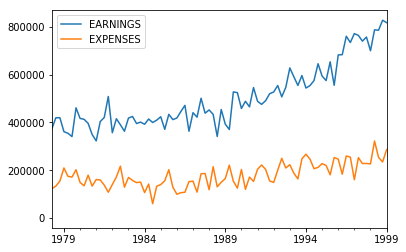

In [32]:
""" Problem 4"""
from datetime import datetime
import numpy as np
import pandas as pd
WT = pd.read_csv('website_traffic.csv')
date_index = pd.to_datetime(WT['ENTER'], format="%Y-%m-%d %H:%M:%S")
date_index2 = pd.to_datetime(WT['LEAVE'], format="%Y-%m-%d %H:%M:%S")
A = date_index2-date_index
A = A.astype('timedelta64[s]')
B = pd.DataFrame(A.values, index= date_index, columns=['duration'])
mins = B.resample('T')
C = mins.mean()
hours = B.resample('H')
D = hours.mean()
E = pd.date_range(start='01:01', end='22:58', freq='T')
F = pd.date_range(start='01:00', end='22:00', freq='H')
G = pd.DataFrame(C.values, index= E, columns=['seconds'])
H = pd.DataFrame(D.values, index= F, columns=['seconds'])
plt.plot(G)
plt.plot(H)
plt.show()

In [33]:
""" Problem 5"""

DJIA = pd.read_csv('djia.csv')
pd.to_datetime(DJIA['DATE'])
date_index = pd.to_datetime(DJIA['DATE'], format="%Y-%m-%d")
B = pd.DataFrame(DJIA['VALUE'].values, index=date_index)
B = B[B != '.']
B = B.astype(np.float)
B1= B.shift(1)-B
#Single day with largest gain
print(B1.idxmax(axis=0))
#Single day with largest loss
print(B1.idxmin(axis=0))
#Month with largest gain
month = B1.resample('M')
B2 = month.agg(sum)
print(B2.idxmax(axis=0))
#Month with largest loss
print(B2.idxmin(axis=0))

0   2008-09-29
dtype: datetime64[ns]
0   2008-10-13
dtype: datetime64[ns]
0   2008-10-31
dtype: datetime64[ns]
0   2015-10-31
dtype: datetime64[ns]


In [26]:
""" Problem 6"""

# Generate a time series using random walk from a uniform distribution.
DJIA = pd.read_csv('djia.csv')
pd.to_datetime(DJIA['DATE'])
date_index = pd.to_datetime(DJIA['DATE'], format="%Y-%m-%d")
B = pd.Series(DJIA['VALUE'].values, index=date_index)
B = B[B != '.']
B = B.astype(np.float)
 #s = pd.Series(s.cumsum(), index=pd.date_range("2015-10-20", freq='H', periods=N))
 # Plot the original data together with a rolling average.

ax1 = plt.subplot(111)
a = 30
B.plot(color="gray", lw=.3, ax=ax1)
B.rolling(window=a).mean().plot(color='r', lw=1, ax=ax1)
B.rolling(window=a).max().plot(color='y', lw=1, ax=ax1)
B.rolling(window=a).min().plot(color='m', lw=0.5, ax=ax1)
B.ewm(span=a).mean().plot(color='g', lw=0.5, ax=ax1)
ax1.legend(["Actual", "Rolling","EWMA","Max Roll","Min Roll"], loc="lower right")
ax1.set_title("DJIA_Window=30")

Text(0.5,1,'DJIA_Window=30')

In [34]:
ax2 = plt.subplot(111)
a=120
B.plot(color="gray", lw=.3, ax=ax2)
B.rolling(window=a).mean().plot(color='r', lw=1, ax=ax2)
B.rolling(window=a).max().plot(color='y', lw=1, ax=ax2)
B.rolling(window=a).min().plot(color='m', lw=0.5, ax=ax2)
B.ewm(span=a).mean().plot(color='g', lw=0.5, ax=ax2)
ax2.legend(["Actual", "Rolling","EWMA","Max Roll","Min Roll"], loc="lower right")
ax2.set_title("DJIA_Window=120")

Text(0.5,1,'DJIA_Window=120')

In [35]:
ax2 = plt.subplot(111)
a=365
B.plot(color="gray", lw=.3, ax=ax2)
B.rolling(window=a).mean().plot(color='r', lw=1, ax=ax2)
B.rolling(window=a).max().plot(color='y', lw=1, ax=ax2)
B.rolling(window=a).min().plot(color='m', lw=0.5, ax=ax2)
B.ewm(span=a).mean().plot(color='g', lw=0.5, ax=ax2)
ax2.legend(["Actual", "Rolling","EWMA","Max Roll","Min Roll"], loc="lower right")
ax2.set_title("DJIA_Window=365")

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'DJIA_Window=365')